<a href="https://colab.research.google.com/github/Sans7349/CodersCave-Data_Science-CVIP_Project/blob/main/ADDITIONAL_TASK_1_SOCIAL_MEDIA_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/Data LIWC 01 02 23.csv'  # Update the path to your file
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


   Sno  X  State       conversation_id  retweet_count  reply_count  \
0    1  1  Assam  S1438213588544409600              0            1   
1    2  2  Assam  S1438437895270846464              0            1   
2    3  3  Assam  S1439558164936941574              0            1   
3    4  4  Assam  S1439920409801945089              0            1   
4    5  5  Assam  S1440221445011898371              0            1   

   like_count  quote_count  Buzz                    id  ...    i we.1 they  \
0           1            0     3  S1438213588544409600  ...  0.0  0.0  0.0   
1           1            0     3  S1438437895270846464  ...  0.0  0.0  0.0   
2           1            0     3  S1439558164936941574  ...  0.0  0.0  0.0   
3           3            0     5  S1439920409801945089  ...  0.0  0.0  0.0   
4           1            0     3  S1440221445011898371  ...  0.0  0.0  0.0   

  insight cause discrep certitude  Positive Negative Total_Sentiment  
0    3.23   0.0    0.00       0.0      

In [ ]:
# Handle missing values
data = data.dropna()

# Drop unnecessary columns
columns_to_drop = ['Sno', 'X', 'id']
data = data.drop(columns=columns_to_drop)

# Display the cleaned dataset
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23006 entries, 0 to 23005
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State            23006 non-null  object 
 1   conversation_id  23006 non-null  object 
 2   retweet_count    23006 non-null  int64  
 3   reply_count      23006 non-null  int64  
 4   like_count       23006 non-null  int64  
 5   quote_count      23006 non-null  int64  
 6   Buzz             23006 non-null  int64  
 7   Date1            23006 non-null  object 
 8   OpnHours         23006 non-null  object 
 9   DateDay          23006 non-null  object 
 10  Day              23006 non-null  object 
 11  Time             23006 non-null  object 
 12  3-Phase          23006 non-null  object 
 13  4-phase          23006 non-null  object 
 14  Followers        23006 non-null  int64  
 15  Status text      23006 non-null  object 
 16  Vividness        23006 non-null  object 
 17  ContentType 

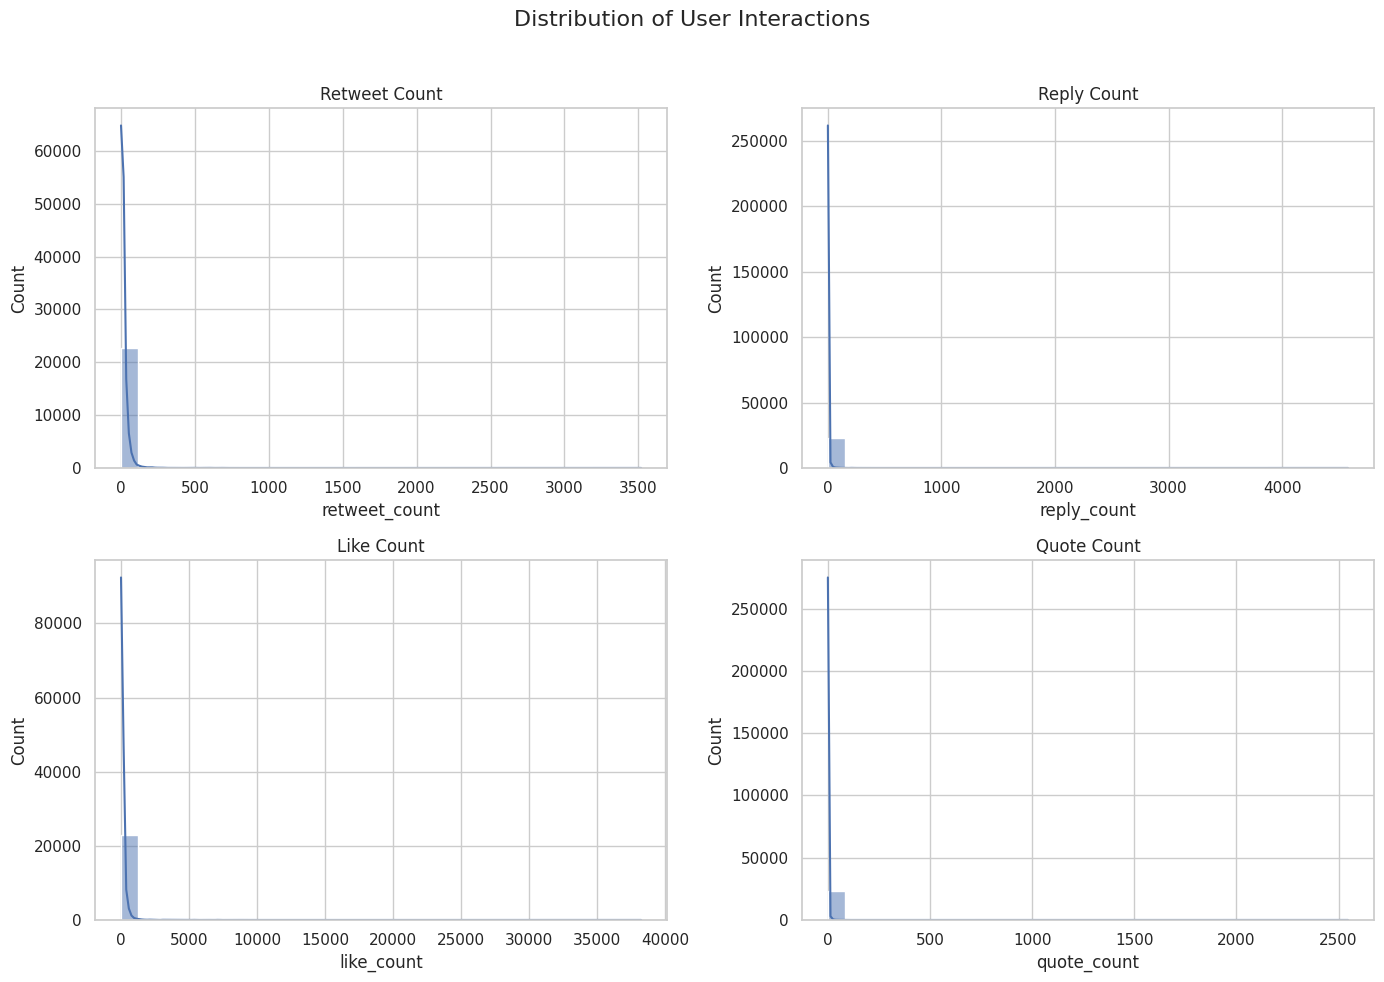

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot distribution of interactions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution of User Interactions', fontsize=16)

sns.histplot(data['retweet_count'], bins=30, kde=True, ax=axes[0, 0]).set_title('Retweet Count')
sns.histplot(data['reply_count'], bins=30, kde=True, ax=axes[0, 1]).set_title('Reply Count')
sns.histplot(data['like_count'], bins=30, kde=True, ax=axes[1, 0]).set_title('Like Count')
sns.histplot(data['quote_count'], bins=30, kde=True, ax=axes[1, 1]).set_title('Quote Count')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


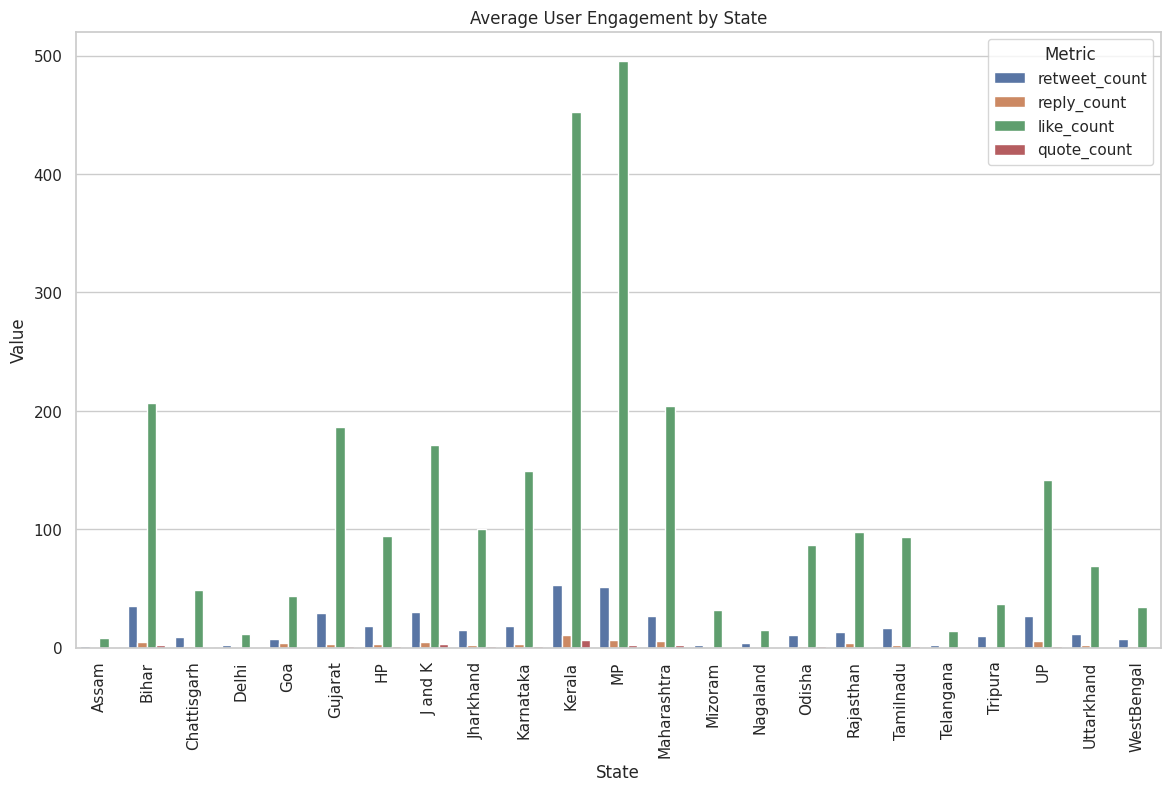

In [ ]:
# Group by state and calculate mean engagement metrics
state_engagement = data.groupby('State')[['retweet_count', 'reply_count', 'like_count', 'quote_count']].mean().reset_index()

# Plot engagement by state
state_engagement = state_engagement.melt(id_vars='State', var_name='Metric', value_name='Value')
plt.figure(figsize=(14, 8))
sns.barplot(x='State', y='Value', hue='Metric', data=state_engagement)
plt.title('Average User Engagement by State')
plt.xticks(rotation=90)
plt.show()


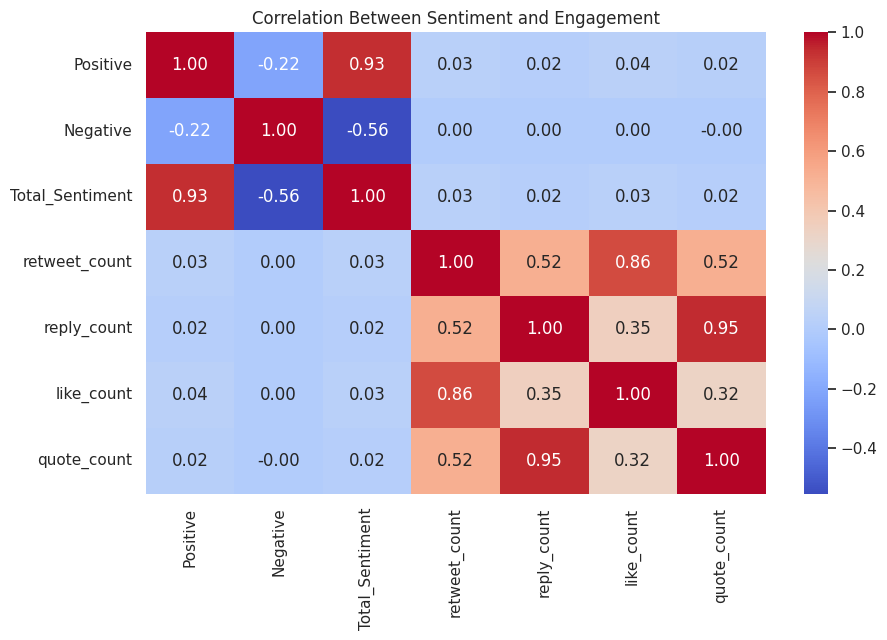

In [ ]:
# Correlation between sentiment and engagement
sentiment_engagement_corr = data[['Positive', 'Negative', 'Total_Sentiment', 'retweet_count', 'reply_count', 'like_count', 'quote_count']].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(sentiment_engagement_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Sentiment and Engagement')
plt.show()
